In [56]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import cell
from skimage.filters import roberts, sobel, scharr, prewitt, laplace, gaussian,rank
from skimage.feature import canny
from skimage.color import rgb2gray
from skimage.morphology import disk

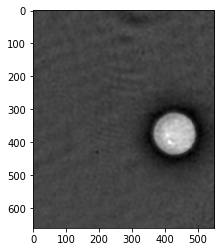

In [17]:
image=cell()
plt.imshow(image,cmap='gray')

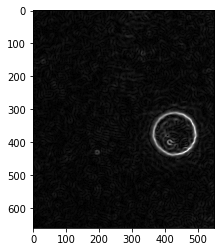

In [23]:
#Prewitt
edges1 = prewitt(image)
plt.imshow(edges1,cmap='gray')

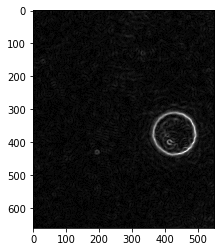

In [24]:
#Roberts
edges2 = roberts(image)
plt.imshow(edges2,cmap='gray')

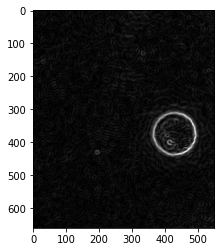

In [25]:
#Sobel
edges3 = sobel(image)
plt.imshow(edges3,cmap='gray')

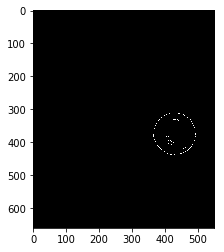

In [26]:
#canny
edges4=canny(image)
plt.imshow(edges4,cmap='gray')

In [39]:
im = rgb2gray(cell()).astype(float)
print(np.max(im))
print(im.shape)
print(im.ndim)

255.0
(660, 550)
2


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """Entry point for launching an IPython kernel.


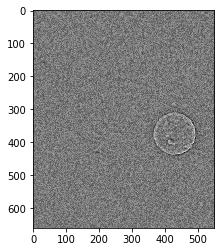

In [42]:
#laplacian
laplace_kernel = np.array(im)
im_edges=laplace(im,ksize=im.ndim+1,mask=laplace_kernel)
plt.imshow(im_edges,cmap='gray')

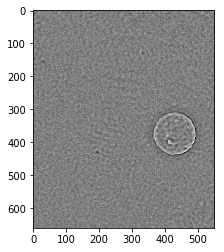

In [49]:
#Gaussian after laplacian
filtered_img = gaussian(im_edges, sigma=0.7, multichannel=True)
plt.imshow(filtered_img,cmap='gray')

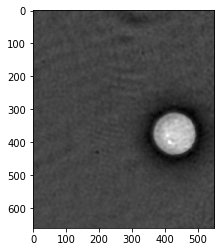

In [53]:
#adding original image and laplacian mask image which gives output of sharpened immage
sharpened_image=im+im_edges
plt.imshow(sharpened_image,cmap='gray')

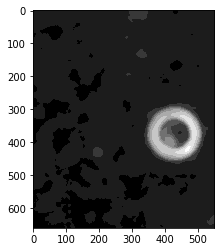

In [58]:
selem = disk(20)
smooth_sobel = rank.mean(edges3, selem=selem)
plt.imshow(smooth_sobel,cmap='gray')

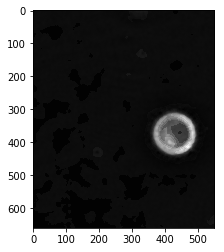

In [60]:
mask_image=smooth_sobel*sharpened_image
plt.imshow(mask_image,cmap='gray')

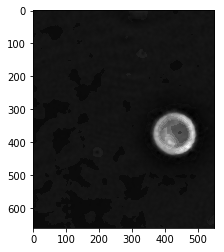

In [61]:
final_image=im+mask_image
plt.imshow(final_image,cmap='gray')